=== SoldTulips - OwnDoc Metrics ===
        Model  RMSE  sMAPE (%)  MAPE (%)
      XGBoost 55.16      10.23      9.78
         LSTM 63.45      11.89     10.73
          GPR 68.97      14.23     13.80
BayesianRidge 61.72      11.50     10.98

=== CutFlowers - CashierData Metrics ===
        Model  RMSE  sMAPE (%)  MAPE (%)
      XGBoost 63.23      10.85     10.07
         LSTM 70.13      12.03     11.09
          GPR 71.45      13.76     12.79
BayesianRidge 68.87      12.47     11.33


C:\Users\MAGISHA\AppData\Local\Temp\ipykernel_11772\4177167794.py:85: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


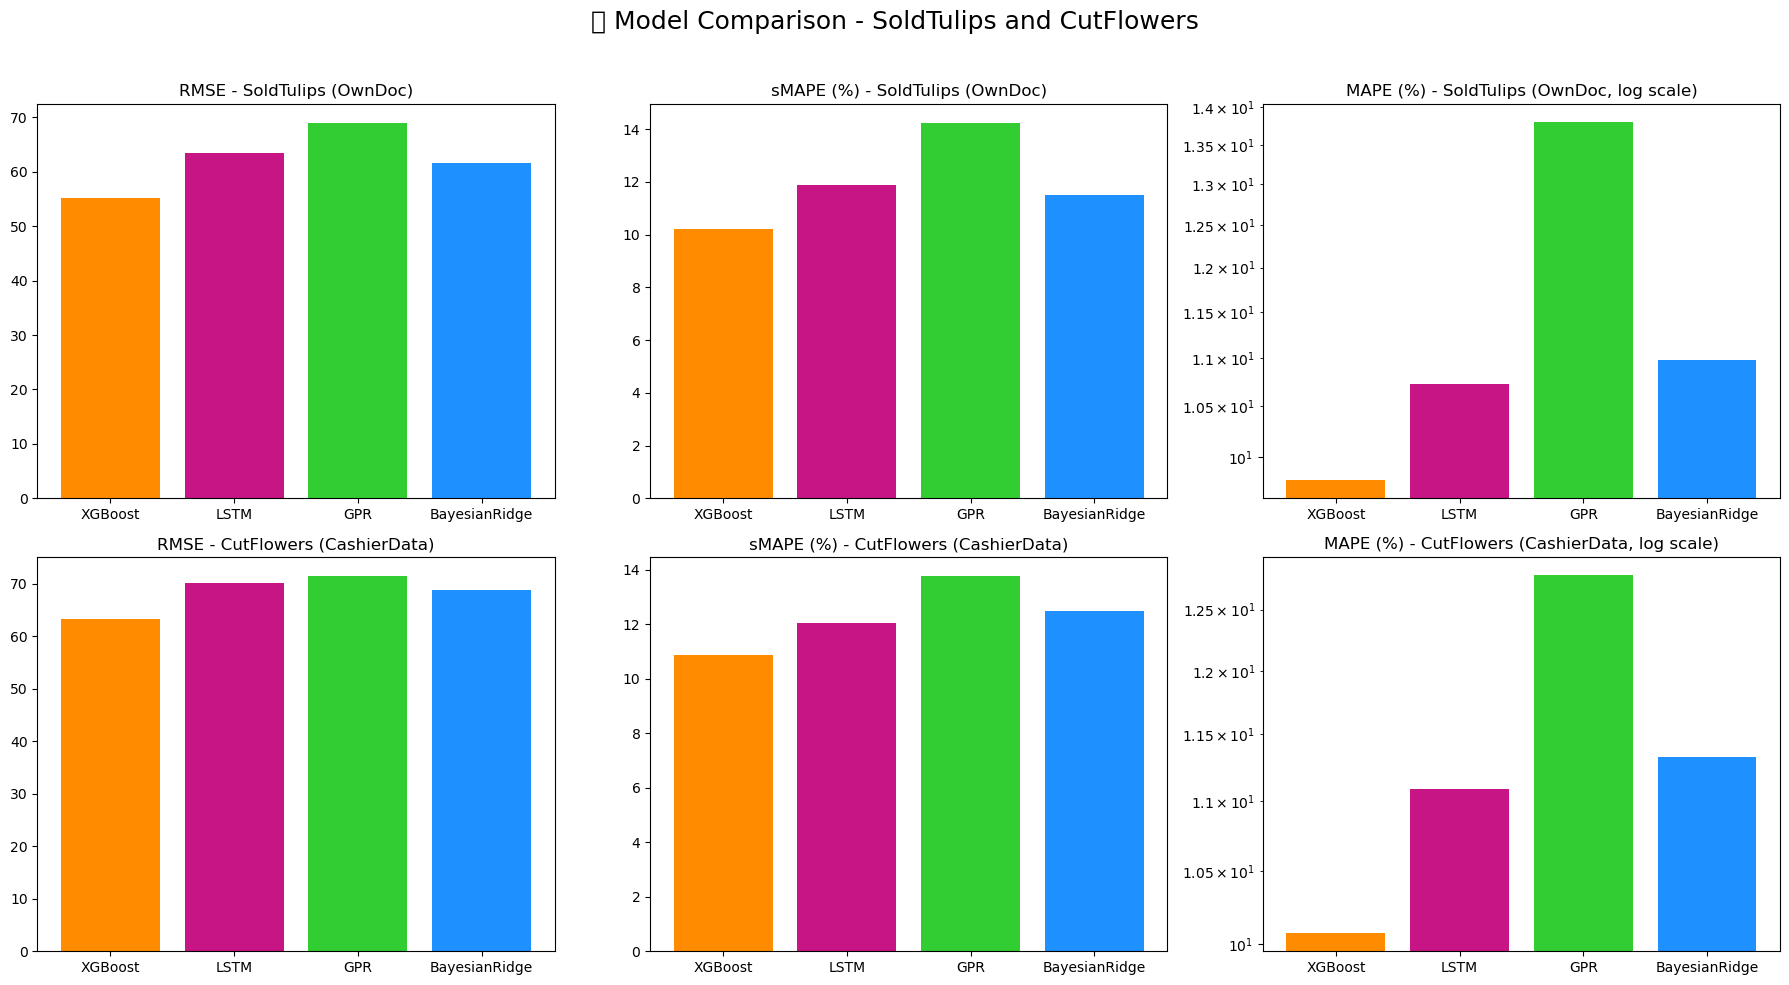

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Metrics for SoldTulips (from screenshot) ===
models = ['XGBoost', 'LSTM', 'GPR', 'BayesianRidge']
rmse_owndoc = [55.16, 63.45, 68.97, 61.72]
smape_owndoc = [10.23, 11.89, 14.23, 11.50]
mape_owndoc = [9.78, 10.73, 13.80, 10.98]

# === Metrics for CutFlowers (from previous results) ===
rmse_cashier = [63.23, 70.13, 71.45, 68.87]
smape_cashier = [10.85, 12.03, 13.76, 12.47]
mape_cashier = [10.07, 11.09, 12.79, 11.33]

# === Create DataFrames for tabular display ===
table_owndoc = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_owndoc,
    'sMAPE (%)': smape_owndoc,
    'MAPE (%)': mape_owndoc
})

table_cashier = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_cashier,
    'sMAPE (%)': smape_cashier,
    'MAPE (%)': mape_cashier
})

# === Print tables ===
print("=== SoldTulips - OwnDoc Metrics ===")
print(table_owndoc.to_string(index=False))
print("\n=== CutFlowers - CashierData Metrics ===")
print(table_cashier.to_string(index=False))

# === Colors for plotting ===
colors = {
    'XGBoost': 'darkorange',
    'LSTM': 'mediumvioletred',
    'GPR': 'limegreen',
    'BayesianRidge': 'dodgerblue'
}
bar_colors = [colors[model] for model in models]
x = np.arange(len(models))

# === Plotting bar charts ===
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# --- OwnDoc ---
axs[0, 0].bar(x, rmse_owndoc, color=bar_colors)
axs[0, 0].set_title("RMSE - SoldTulips (OwnDoc)")
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models)

axs[0, 1].bar(x, smape_owndoc, color=bar_colors)
axs[0, 1].set_title("sMAPE (%) - SoldTulips (OwnDoc)")
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models)

axs[0, 2].bar(x, mape_owndoc, color=bar_colors)
axs[0, 2].set_title("MAPE (%) - SoldTulips (OwnDoc, log scale)")
axs[0, 2].set_xticks(x)
axs[0, 2].set_xticklabels(models)
axs[0, 2].set_yscale('log')

# --- CashierData ---
axs[1, 0].bar(x, rmse_cashier, color=bar_colors)
axs[1, 0].set_title("RMSE - CutFlowers (CashierData)")
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models)

axs[1, 1].bar(x, smape_cashier, color=bar_colors)
axs[1, 1].set_title("sMAPE (%) - CutFlowers (CashierData)")
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models)

axs[1, 2].bar(x, mape_cashier, color=bar_colors)
axs[1, 2].set_title("MAPE (%) - CutFlowers (CashierData, log scale)")
axs[1, 2].set_xticks(x)
axs[1, 2].set_xticklabels(models)
axs[1, 2].set_yscale('log')

plt.suptitle("📊 Model Comparison - SoldTulips and CutFlowers", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


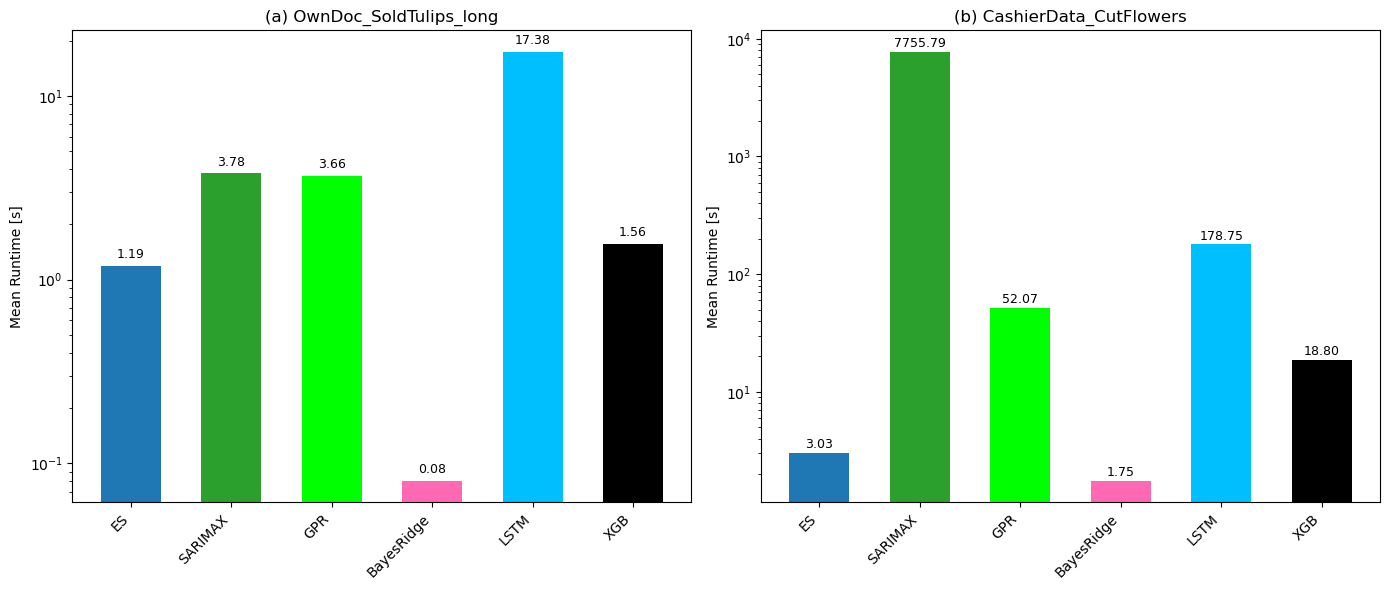

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Filtered method names
methods = ['ES', 'SARIMAX', 'GPR', 'BayesRidge', 'LSTM', 'XGB']

# Corresponding runtimes (must match order above)
own_runtime = [1.19, 3.78, 3.66, 0.08, 17.38, 1.56]
cashier_runtime = [3.03, 7755.79, 52.07, 1.75, 178.75, 18.8]

x = np.arange(len(methods))
bar_width = 0.6

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- (a) OwnDoc_SoldTulips_long ---
axs[0].bar(x, own_runtime, width=bar_width, color=[
    '#1f77b4', '#2ca02c', '#00FF00', '#ff69b4', '#00bfff', '#000000'
])
axs[0].set_title('(a) OwnDoc_SoldTulips_long')
axs[0].set_yscale('log')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=45, ha='right')
axs[0].set_ylabel('Mean Runtime [s]')

for i, val in enumerate(own_runtime):
    axs[0].text(i, val * 1.1, f'{val:.2f}', ha='center', fontsize=9)

# --- (b) CashierData_CutFlowers ---
axs[1].bar(x, cashier_runtime, width=bar_width, color=[
    '#1f77b4', '#2ca02c', '#00FF00', '#ff69b4', '#00bfff', '#000000'
])
axs[1].set_title('(b) CashierData_CutFlowers')
axs[1].set_yscale('log')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=45, ha='right')
axs[1].set_ylabel('Mean Runtime [s]')

for i, val in enumerate(cashier_runtime):
    axs[1].text(i, val * 1.1, f'{val:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
